**K-means 군집화**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
X = iris.drop('target', axis=1) #비지도학습
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


513.3038433517568
560.3999242466402


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


529.1207190840455


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


494.0943819140986


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


474.51742958716295
448.8714494416451


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


436.61302488142496
414.5303174051382


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


콜린스키 하라바츠 스코어 결과 k값이 3일때 가장 높은 값을 가지는 것을 확인 <br>
콜린스키 하라바츠 스코어만을 가지고 k값을 확정짓기 어려운 데이터가 있을 수 있다. 그럴 때엔 분산에 대한 검정뿐 아니라 SSE의 증감을 보는 `엘보우기법`을 사용하여 적정한 K값을 추가로 확인해주는 것이 좋다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

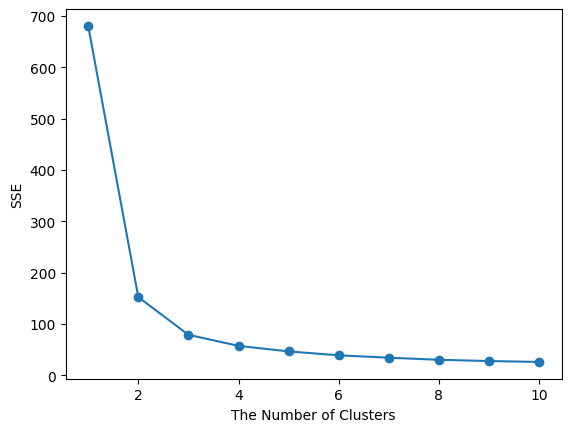

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.34540931571814, 46.53558205128205, 38.95701115711986, 34.326529914529914, 30.227724598930486, 27.766706937799043, 26.072251823340057]


In [ ]:
# elbowpoint확인
import matplotlib.pyplot as plt
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

elbow(X)

k값이 2에서 3으로 갈때 기울기 소실이 발생하므로 해당 데이터는 2~3개의 군집이 적절함을 알 수 있다.

**Optimal_K = 3 으로 cluster 진행**

In [ ]:
# 최적의 k로 K-means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

# 할당된 군집을 iris데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels
iris.groupby(['cluster']).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-9-8287b0c60c58>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iris.groupby(['cluster']).mean()


,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


군집분석 결과 군집별로 각 특성의 차이가 있는 것이 보인다. <Br>

이를 제대로 검정하기 위해서는 `ANOVA분석`을 진행하는 것이 좋다.

본 데이터를 시각화하여 분포도를 그려보는 것이 해석하기에 더욱 편함.

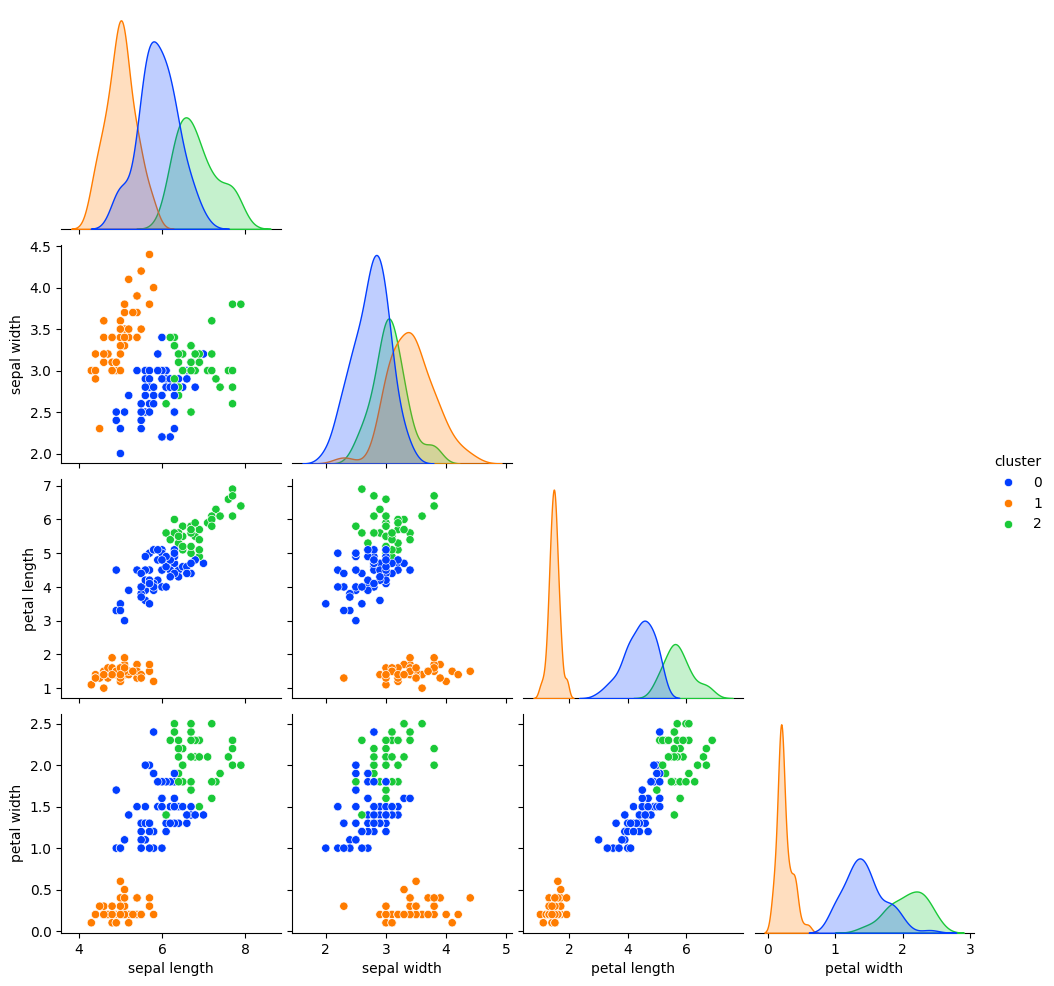

In [ ]:
# k-means시각화
# 군집결과 시각화
import seaborn as sb
import matplotlib.pyplot as plt
sb.pairplot(iris,
            diag_kind='kde',
            hue='cluster',
            corner=True,
            palette='bright')
plt.show()

변수의 특징별로 3개의 군집으로 잘 나뉘었음을 알 수 있다.

특히 cluster1은 0,2보다 잘 분리되었다.